In [1]:
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import random
#Generate 20 random numbers between 0 and 20
x = random.sample(range(0,21), 21)
print(x)
print(len(x))

[17, 10, 12, 20, 18, 7, 16, 6, 14, 19, 13, 1, 11, 8, 0, 9, 2, 15, 5, 3, 4]
21


In [3]:
a=-2
b=1
y=[]
for i in range(0,21):
    y.append(a*x[i]+b)
print(y)    
print(len(y))

[-33, -19, -23, -39, -35, -13, -31, -11, -27, -37, -25, -1, -21, -15, 1, -17, -3, -29, -9, -5, -7]
21


In [4]:
th0=0
th1=0
alpha=0.0001
#######################################
#func to calcolate Hypothesis
def hypo(o1,o2,arr):
    h=[]
    for i in range (0,len(arr)):
        h.append(o1 + o2 *arr[i])
    return h    

#func to calculate error
def err(o1,o2,arr1,arr2):
    r=[]
    h=hypo(o1,o2,arr1)
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])**2)
    return r

#func to calculate h(x)-y(x)
def hminy(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append(h[i]-arr2[i])
    return r

#func to calculate (h(x)-y(x))*x
def hminymulx(o1,o2,arr1,arr2):
    h=hypo(o1,o2,arr1)
    r=[]
    for i in range (0,len(arr1)):
        r.append((h[i]-arr2[i])*arr1[i])
    return r
    
    
    
####################################################


#here cost function
def cost(arr):
    sm=0
    sm = numpy.sum(arr)
    #print('cost funtion equal ',(1/(2*len(arr)))*sm) 
    return (1/(2*len(arr)))*sm

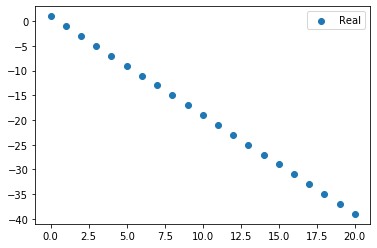

In [5]:
plt.scatter(x,y,label='Real')

plt.legend()
plt.show()  

# Adagrad

In [21]:
def Adagrad(thm0,thm1,inp,out,lrm):
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    
    for i in range (0,1000):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print(cost(ernew))
        
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(1/len(ft0))*sm0
        vt0=vt0+(grad0**2)
        thm0=thm0-((lrm/(np.sqrt(vt0)+10**(-8)))*grad0)
        arrth0.append(thm0)
        
        
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(1/len(ft1))*sm1
        vt1=vt1+(grad1**2)
        thm1=thm1-((lrm/(np.sqrt(vt1)+10**(-8)))*grad1)
        arrth1.append(thm1)
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1

In [22]:
thm0ada , thm1ada , y1mnewada , regmada , arrayth0ada , arrtayh1ada = Adagrad(0,0,x,y,0.1)


253.83333333333331
-0.09999999994736843    -0.09999999999618805
226.38833333522328
-0.16857230988772862    -0.1686948046955425
208.45070095370983
-0.22346892687975184    -0.2237453050829775
194.61369783597652
-0.27026939483693696    -0.27071407707121237
183.18623889425254
-0.311562429999856    -0.31218437074595135
173.38598487713824
-0.3487957711484262    -0.3496016240227799
164.77646614144768
-0.38287513004871493    -0.38387040449375787
157.08523364757082
-0.4144114544422503    -0.41560101991380566
150.12890130953184
-0.4438398425759178    -0.44522817703413176
143.777142172768
-0.4714831361074402    -0.4730744602751034
137.9334557560063
-0.4975887066398633    -0.49938706197850424
132.52405404370396
-0.522351066163477    -0.5243603629118478
127.4910371036685
-0.5459264526617216    -0.5481505009303689
122.78799498272933
-0.5684426179813478    -0.5708851487487446
118.37705903726267
-0.5900056157011718    -0.5926702955205123
114.22685889886475
-0.6107046413356965    -0.6135950829723271
11

0.7751774979554679
-1.3999166703929928    -1.8188046245640646
0.7747658701038328
-1.3992904406328466    -1.8188612058662696
0.774354491243042
-1.3986642874966713    -1.8189176791140638
0.7739433607197523
-1.398038212047875    -1.818974045334954
0.7735324778920237
-1.3974122153376873    -1.8190303055453623
0.7731218421290752
-1.396786298405293    -1.8190864607507438
0.7727114528110494
-1.3961604622779615    -1.8191425119457079
0.7723013093287736
-1.3955347079711777    -1.8191984601141347
0.7718914110835317
-1.3949090364887697    -1.819254306229291
0.7714817574868401
-1.3942834488230358    -1.819310051253946
0.7710723479602279
-1.3936579459548697    -1.8193656961404847
0.7706631819350239
-1.3930325288538852    -1.8194212418310203
0.7702542588521418
-1.3924071984785387    -1.8194766892575058
0.7698455781618796
-1.39178195577625    -1.8195320393418442
0.769437139323713
-1.391156801683524    -1.8195872929959964
0.7690289418061079
-1.3905317371260677    -1.8196424511220906
0.7686209850863142

In [23]:
from sklearn.metrics import r2_score

smada = r2_score(y,y1mnewada)

print(smada)

0.991139688551341


# RMS

In [26]:
def RMSPROP(thm0,thm1,inp,out,lrm,beta):
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    
    for i in range (0,1000):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print(cost(ernew))
        
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(1/len(ft0))*sm0
        vt0=(beta*vt0)+((1-beta)*(grad0**2))
        thm0=thm0-((lrm/(np.sqrt(vt0)+10**(-8)))*grad0)
        arrth0.append(thm0)
        
        
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(1/len(ft1))*sm1
        vt1=(beta*vt1)+((1-beta)*(grad1**2))
        thm1=thm1-((lrm/(np.sqrt(vt1)+10**(-8)))*grad1)
        arrth1.append(thm1)
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1

In [28]:
thm0rms , thm1rms , y1mnewrms , regmrms , arrayth0rms , arrtayh1rms = RMSPROP(0,0,x,y,0.1,0.9)


253.83333333333331
-0.31622776549052223    -0.3162277659784018
172.43502741108748
-0.5225735590874508    -0.5238747941143684
127.57864064005435
-0.6825877983395074    -0.6856920361702323
97.34053604295696
-0.8151529506238859    -0.8204405371699645
75.3128843572019
-0.928724021558917    -0.9365587116562384
58.627811132080474
-1.0278815197524755    -1.0386416266672938
45.71528760609181
-1.1153987596405872    -1.1294907438160766
35.604782230235564
-1.1930817067279844    -1.2109480117327325
27.644789954479002
-1.2621690870396727    -1.284293577788513
21.37098670959549
-1.3235457184196397    -1.3504578176571262
16.43720097288989
-1.377866486879831    -1.4101443510363256
12.57633996901945
-1.4256335998036775    -1.463906380482025
9.576934092821949
-1.4672476029312127    -1.5121967178836584
7.268396788353823
-1.5030427061557654    -1.5554020033778093
5.5114045392852
-1.5333121100075993    -1.5938668198737982
4.19139835508669
-1.5583264924814795    -1.6279109136351104
3.214033242071345
-1.5783

1.0499999990906526    -1.9500000000792135
0.19708333225229338
0.9500000009092391    -2.0499999999208924
0.1970833322531295
1.0499999990908842    -1.950000000078983
0.1970833322541114
0.9500000009089977    -2.049999999921137
0.19708333225505642
1.049999999091093    -1.9500000000787674
0.1970833322558069
0.9500000009088543    -2.0499999999212886
0.19708333225624697
1.0499999990911513    -1.950000000078701
0.1970833322563257
0.9500000009088843    -2.0499999999212655
0.19708333225606028
1.0499999990910456    -1.9500000000788018
0.19708333225552876
0.9500000009090399    -2.0499999999211114
0.19708333225484445
1.0499999990908706    -1.9500000000789788
0.19708333225413463
0.9500000009092032    -2.0499999999209444
0.1970833322535301
1.0499999990907478    -1.9500000000791073
0.19708333225312544
0.9500000009092683    -2.0499999999208733
0.19708333225297364
1.0499999990907471    -1.9500000000791131
0.1970833322530809
0.9500000009092097    -2.0499999999209275
0.19708333225340385
1.0499999990908488

In [29]:
from sklearn.metrics import r2_score

smrms = r2_score(y,y1mnewrms)

print(smrms)

0.9973125000147129


# Adam

In [35]:
def ADAM(thm0,thm1,inp,out,lrm,beta1,beta2):
    #here calculate the optimum value  for theta0 and theta1 
    #sm0= numpy.sum(hminy)
    #sm1=numpy.sum(hminymulx)
    #mag0=(alpha*(1/len(hminy))*sm0)
    #mag1=(alpha*(1/len(hminy))*sm1)
    arrth0=[]
    arrth1=[]
    vt0=0
    vt1=0
    tloss=[]
    reg=[]
    m0=0
    m1=0
    for i in range (1,1001):
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
        ernew=err(thm0,thm1,inp,out)
        tloss.append(cost(ernew))
        print(cost(ernew))
        
        ft0=hminy(thm0,thm1,inp,out)    
        sm0= numpy.sum(ft0)   
        grad0=(1/len(ft0))*sm0
        m0=(beta1*m0)+((1-beta1)*(grad0))
        vt0=(beta2*vt0)+((1-beta2)*(grad0**2))
        
        mtemp0=(m0)/(1-(beta1**i))
        vtemp0=(vt0)/(1-(beta2**i))
        thm0=thm0-((lrm/(np.sqrt(vtemp0)+10**(-8)))*mtemp0)
        arrth0.append(thm0)
        
        
        ft1=hminymulx(thm0,thm1,inp,out)    
        sm1= numpy.sum(ft1)   
        grad1=(1/len(ft1))*sm1
        m1=(beta1*m1)+((1-beta1)*(grad1))
        vt1=(beta2*vt1)+((1-beta2)*(grad1**2))
        
        mtemp1=(m1)/(1-(beta1**i))
        vtemp1=(vt1)/(1-(beta2**i))
        thm1=thm1-((lrm/(np.sqrt(vtemp1)+10**(-8)))*mtemp1)
        arrth1.append(thm1)
        
        
        y1new=hypo(thm0,thm1,inp)
        reg.append(y1new)
    
        
        print(thm0,'  ',thm1)
        
        #ernew=err(thm0,thm1,inp,out)
        #tloss.append(cost(ernew))

    return thm0 , thm1 , y1new , reg , arrth0 , arrth1 

In [39]:
thm0adam , thm1adam , y1mnewadam , regmadam , arrayth0adam , arrtayh1adam  = ADAM(0,0,x,y,0.01,0.9,0.99)

253.83333333333331
-0.00999999999473684    -0.009999999999620108
251.01788333353215
-0.019998575751784722    -0.01999863101910291
248.21858323015567
-0.02999477036931903    -0.029994973724783894
245.43568244273695
-0.03998762427247828    -0.03998810655663887
242.669425203268
-0.049976177517635514    -0.049977107950620964
239.92004993098763
-0.059959472072618286    -0.059961058536565706
237.18778863624092
-0.06993655405517865    -0.06993904329463228
234.47286635774051
-0.07990647591278519    -0.07991015365400558
231.77550063712553
-0.08986829852782148    -0.08987348951857148
229.09590103422573
-0.09982109323350177    -0.09982816120547146
226.43426868591385
-0.10976394372722569    -0.10977329128381297
223.79079591087302
-0.11969594786965534    -0.11970801630232523
221.16566586203575
-0.12961621935947407    -0.12963148839637295
218.5590522278748
-0.1395238892755388    -0.13954287676643518
215.97111898315816
-0.1494181074799322    -0.14944136902188923
213.40202018922417
-0.1592980438772177

0.10099197046054884    -1.9332419138281873
0.10848437160715782
0.10575783472081371    -1.933598574459254
0.10733684932907761
0.11051894620865481    -1.9339548553361823
0.10619656792688523
0.11527521761373731    -1.9343107500046004
0.10506352981671321
0.12002656154786977    -1.9346662520058377
0.10393773700600759
0.12477289054673286    -1.9350213548770403
0.1028191910937787
0.1295141170716188    -1.935376052151288
0.10170789327088964
0.13425015351118205    -1.935730337357712
0.10060384432037298
0.13898091218320216    -1.936084204021614
0.09950704461778585
0.14370630533635934    -1.9364376456645855
0.09841749413159227
0.14842624515202338    -1.9367906558046286
0.09733519242357878
0.15314064374605676    -1.9371432279562766
0.09626013864930531
0.1578494131706326    -1.9374953556307168
0.09519233155858475
0.16255246541606824    -1.937847032335915
0.09413176949599908
0.167249712412675    -1.9381982515767389
0.09307845040144157
0.1719410660326252    -1.9385490068550846
0.09203237181069823
0.1

In [40]:
from sklearn.metrics import r2_score

smadam = r2_score(y,y1mnewadam)

print(smadam)

0.9999464844107867


In [ ]:
list_n = np.arange(1, 101).tolist()
print(list_n)

plt.plot(tloss,list_n,label='loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()